In [4]:
from pylab import *
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [5]:
import pyAgrum as gum

# create Bayesian network
bn = gum.BayesNet('WaterSprinkler')
# add nodes for cloudy, rainy, sprinker on, wet grass random variables
c, r, s, w = [ bn.add(var) for var in "crsw" ]

# add edges to the DAG
bn.addArc(c, s)
bn.addArc(c, r)
bn.addArc(r, w)
bn.addArc(s, w)

In [6]:
import pyAgrum.lib.notebook as gnb

bn

(pyAgrum.BayesNet<double>@0x272195c1eb0) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [28]:
bn.cpt(c).fillWith([.4, .6])            #  p(c)

bn.cpt(s)[{'c':0}] = [.5, .5]           # p(s | c = 0)
bn.cpt(s)[{'c':1}] = [.9, .1]           # p(s | c = 1)

bn.cpt(r)[{'c':0}] = [.8, .2]           # p(r | c = 0)
bn.cpt(r)[{'c':1}] = [.2, .8]           # p(r | c = 1)

bn.cpt(w)[{'r':0, 's':0}] = [1, 0]      # p(r | r = 0, s = 0)
bn.cpt(w)[{'r':0, 's':1}] = [.1, .9]    # p(r | r = 0, s = 1)
bn.cpt(w)[{'r':1, 's':0}] = [.1, .9]    # p(r | r = 1, s = 0)
bn.cpt(w)[{'r':1, 's':1}] = [.01, .99]  # p(r | r = 1, s = 1)

bn.cpt(w)

(pyAgrum.Potential<double>@0x2721130ec80) 
             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

In [29]:
ie = gum.LazyPropagation(bn)

$p(W=1 | S = 0, C = 0)$

In [43]:
ie.setEvidence({'s':0, 'c':0})
ie.makeInference()
ie.posterior(w)

(pyAgrum.Potential<double>@0x272195db720) 
  w                |
0        |1        |
---------|---------|
 0.8200  | 0.1800  |

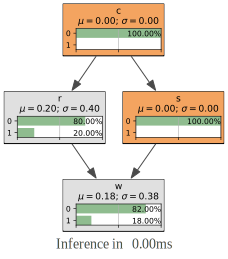

In [56]:
gnb.showInference(bn, evs={'s':[1, 0], 'c': 0})

### Chest clinic Bayesian network

In [57]:
cc = gum.fastBN("a->t->e<-l<-s->b->d<-e->x")
cc

(pyAgrum.BayesNet<double>@0x272195f9e00) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 18, mem: 288o}

In [62]:
cc.isIndependent('l', 'b', ['s'])

True